In [3]:
# ===============================================================
# 📊 BK_DEP — Otimização de Conversão em Campanha Bancária
# Etapa 02 — Análise Exploratória de ROI, CPA e Conversão
# Autor: Bruno Aguiar
# ===============================================================

# 1️⃣ Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Importa bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3️⃣ Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('crest')
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# 4️⃣ Caminho da base integrada
path = '/content/drive/MyDrive/DataProjects/BKDEP/data/outputs/dados_banco_merged.csv'

# 5️⃣ Leitura do dataset
df_merge = pd.read_csv(path)

print(f"✅ Base carregada com sucesso! {df_merge.shape[0]} registros | {df_merge.shape[1]} colunas")

# 6️⃣ Inspeção inicial
df_merge.info()
df_merge.head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Base carregada com sucesso! 38045 registros | 29 colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38045 entries, 0 to 38044
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    38045 non-null  int64  
 1   profissao                38045 non-null  object 
 2   estado_civil             38045 non-null  object 
 3   educacao                 38045 non-null  object 
 4   credito_em_atraso        38045 non-null  int64  
 5   saldo                    38045 non-null  int64  
 6   emprestimo_habitacional  38045 non-null  int64  
 7   emprestimo_pessoal       38045 non-null  int64  
 8   tipo_contato             38045 non-null  object 
 9   dia                      38045 non-null  int64  
 10  mes                      38045 non-null  object 
 

,idade,profissao,estado_civil,educacao,credito_em_atraso,saldo,emprestimo_habitacional,emprestimo_pessoal,tipo_contato,dia,...,mes_num,recontato,tempo_recente,Total_Contactados,Total_Convertidos,Receita_Media,Custo_Total,Receita_Total,CPA,ROI
0,18,student,single,nao_informado,0,438,0,0,cellular,1,...,9,0,0,140.00,39.00,"1,291.41",700.00,"50,365.00",17.95,"7,095.00"
1,18,student,single,secondary,0,156,0,0,cellular,4,...,11,1,82,449.00,136.00,"1,387.55","2,245.00","188,707.00",16.51,"8,305.66"
2,18,student,single,nao_informado,0,348,0,0,cellular,5,...,5,0,0,140.00,39.00,"1,291.41",700.00,"50,365.00",17.95,"7,095.00"


In [4]:
# Verifica valores nulos por coluna
print("\n🔍 Valores nulos por coluna:")
print(df_merge.isnull().sum().sort_values(ascending=False))

# Visualiza resumo estatístico das variáveis numéricas
print("\n📊 Estatísticas descritivas:")
print(df_merge.describe().T)

# Verifica duplicatas
duplicatas = df_merge.duplicated().sum()
print(f"\n⚠️ Registros duplicados: {duplicatas}")


🔍 Valores nulos por coluna:
Total_Convertidos          624
CPA                        624
Receita_Total              624
Receita_Media              624
Custo_Total                624
Total_Contactados          624
faixa_saldo                  1
saldo                        0
idade                        0
profissao                    0
estado_civil                 0
educacao                     0
credito_em_atraso            0
contatos_campanha            0
duracao                      0
mes                          0
dia                          0
tipo_contato                 0
emprestimo_pessoal           0
emprestimo_habitacional      0
dias_desde_contato           0
recontato                    0
mes_num                      0
status_saldo                 0
deposito                     0
contatos_anteriores          0
resultado_anterior           0
tempo_recente                0
ROI                          0
dtype: int64

📊 Estatísticas descritivas:
                            co

In [5]:
import plotly.express as px

# Cria uma cópia de segurança
df_plot = df_merge.copy()

# Substitui NaN ou zeros em Total_Contactados por 1
df_plot['Total_Contactados'] = df_plot['Total_Contactados'].fillna(1)
df_plot.loc[df_plot['Total_Contactados'] <= 0, 'Total_Contactados'] = 1

# Garante que CPA e ROI também não tenham NaN
df_plot = df_plot.dropna(subset=['ROI', 'CPA'])

# Gera o gráfico corrigido
fig = px.scatter(
    df_plot,
    x="CPA",
    y="ROI",
    size="Total_Contactados",
    color="profissao",
    hover_data=["educacao", "estado_civil"],
    title="🎯 Dispersão ROI × CPA (tamanho = Total_Contactados)"
)

fig.update_layout(template="plotly_white")
fig.show()


/tmp/ipython-input-2592523719.py:19: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.



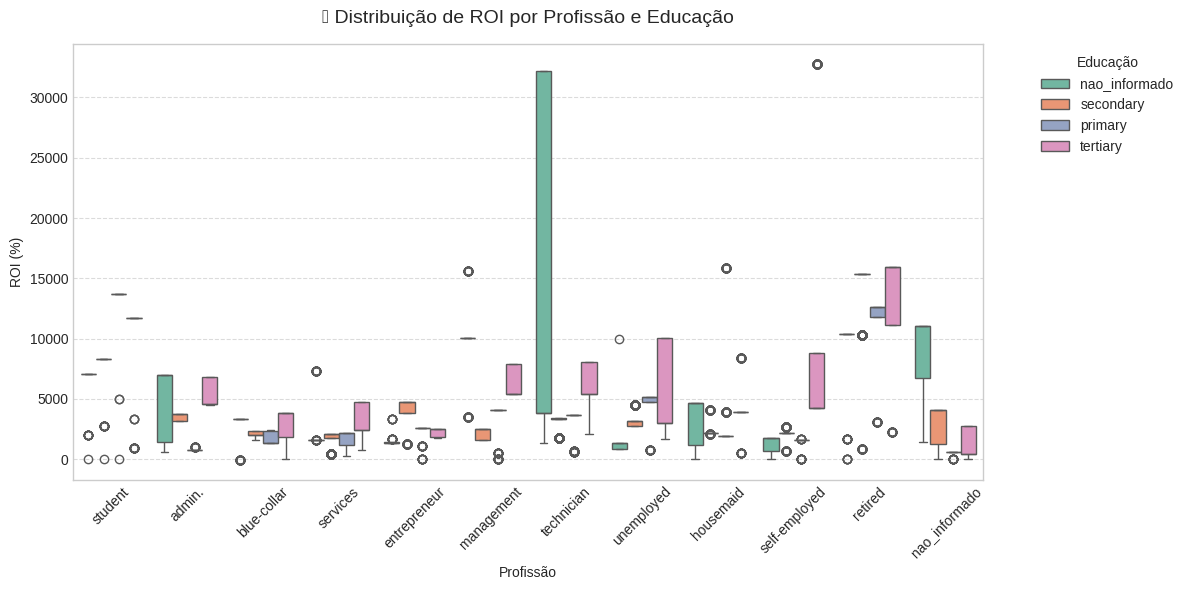

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_merge,
    x="profissao",
    y="ROI",
    hue="educacao",
    palette="Set2"
)

plt.title("🎓 Distribuição de ROI por Profissão e Educação", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.xlabel("Profissão")
plt.ylabel("ROI (%)")
plt.legend(title="Educação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2217574473.py:21: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.



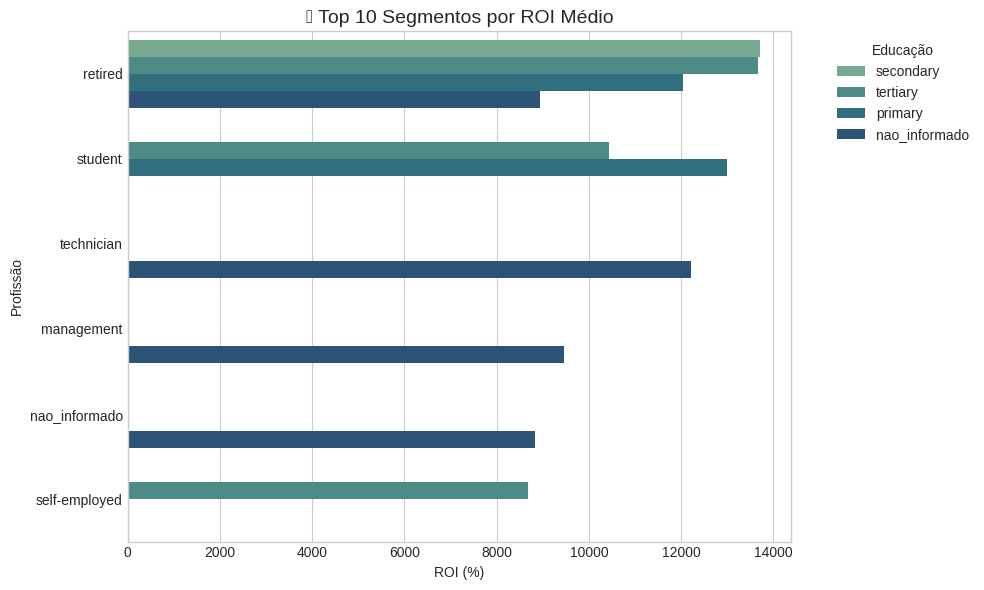

In [7]:
top_roi = (
    df_merge.groupby(['profissao','educacao'])['ROI']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_roi,
    y="profissao",
    x="ROI",
    hue="educacao",
    palette="crest"
)
plt.title("🏆 Top 10 Segmentos por ROI Médio", fontsize=14)
plt.xlabel("ROI (%)")
plt.ylabel("Profissão")
plt.legend(title="Educação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.



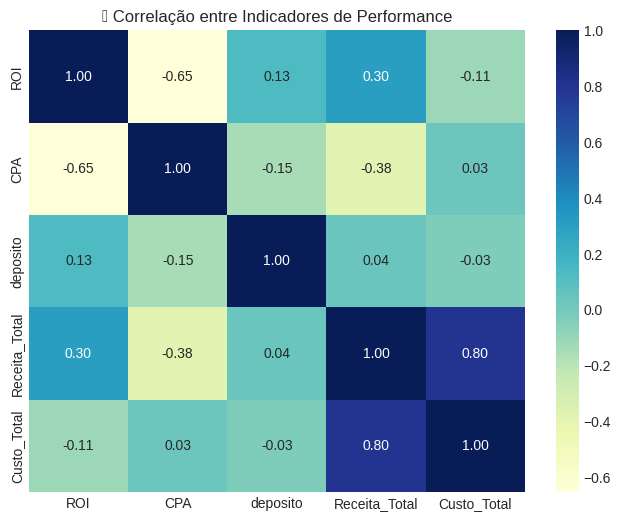

In [8]:
corr = df_merge[['ROI','CPA','deposito','Receita_Total','Custo_Total']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔗 Correlação entre Indicadores de Performance")
plt.show()


In [9]:
roi_mean = df_merge['ROI'].mean()
roi_top = df_merge['ROI'].max()
cpa_mean = df_merge['CPA'].mean()
prof_top = df_merge.loc[df_merge['ROI'].idxmax(), 'profissao']
edu_top = df_merge.loc[df_merge['ROI'].idxmax(), 'educacao']

print(f"💬 O ROI médio geral é {roi_mean:,.2f}%, com CPA médio de R${cpa_mean:,.2f}.")
print(f"O segmento mais rentável foi '{prof_top}' com nível educacional '{edu_top}',")
print(f"atingindo ROI de {roi_top:,.2f}%.")


💬 O ROI médio geral é 4,363.57%, com CPA médio de R$48.37.
O segmento mais rentável foi 'self-employed' com nível educacional 'tertiary',
atingindo ROI de 32,800.27%.


/tmp/ipython-input-2080253279.py:13: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.



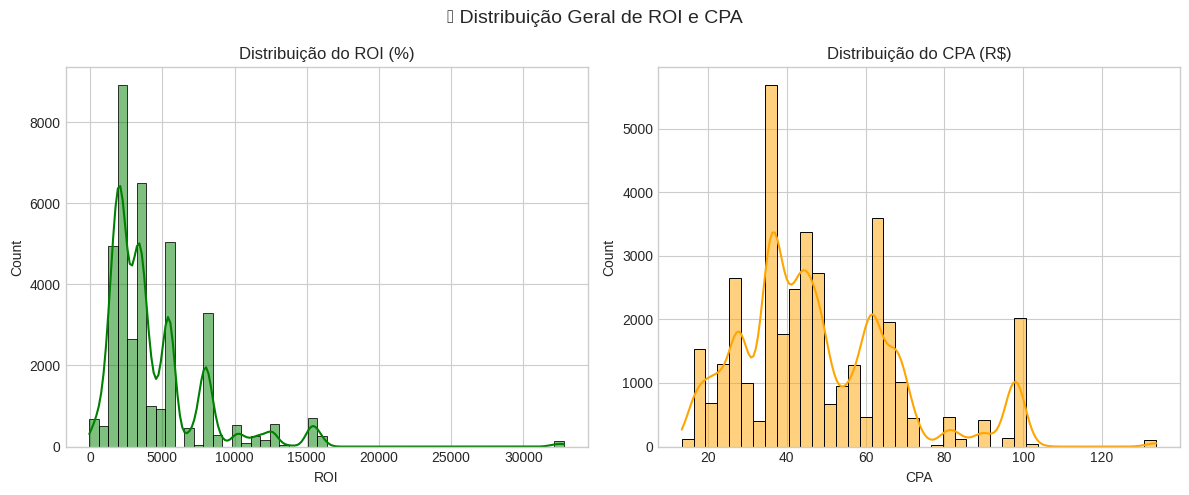

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df_merge['ROI'], bins=50, kde=True, ax=ax[0], color='green')
ax[0].set_title('Distribuição do ROI (%)')

sns.histplot(df_merge['CPA'], bins=40, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribuição do CPA (R$)')

plt.suptitle("📈 Distribuição Geral de ROI e CPA", fontsize=14)
plt.tight_layout()
plt.show()


In [13]:
# ===============================================================
# 📸 EXPORTAÇÃO AUTOMÁTICA DE GRÁFICOS — ETAPA 02 EXPLORATÓRIA
# Projeto: BK_DEP — Otimização de Conversão em Campanha Bancária
# Autor: Bruno Aguiar
# ===============================================================
# 1️⃣ Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install -q kaleido


# 🔧 Importação de libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image, ImageDraw

# Caminho da base integrada (✅ corrigido)
path = '/content/drive/MyDrive/DataProjects/BKDEP/data/outputs/dados_banco_merged.csv'

# Lê a base
df_merge = pd.read_csv(path)
print(f"✅ Base integrada carregada com sucesso! Registros: {df_merge.shape[0]} linhas | {df_merge.shape[1]} colunas\n")

# Caminho da pasta de exportação
path_assets = '/content/drive/MyDrive/DataProjects/BKDEP/assets/etapa02_exploratoria'
os.makedirs(path_assets, exist_ok=True)

print(f"📁 Pasta de exportação criada/verificada: {path_assets}\n")

# ===============================================================
# 1️⃣ Dispersão ROI × CPA (Plotly interativo + PNG estático)
# ===============================================================
df_plot = df_merge.copy()
df_plot['Total_Contactados'] = df_plot['Total_Contactados'].fillna(1)
df_plot.loc[df_plot['Total_Contactados'] <= 0, 'Total_Contactados'] = 1
df_plot = df_plot.dropna(subset=['ROI', 'CPA'])

# 1a) Versão interativa (HTML) com Plotly
fig = px.scatter(
    df_plot,
    x="CPA",
    y="ROI",
    size="Total_Contactados",
    color="profissao",
    hover_data=["educacao", "estado_civil"],
    title="🎯 Dispersão ROI × CPA (tamanho = Total_Contactados)"
)
fig.update_layout(template="plotly_white")

# Salva como HTML (não precisa de kaleido)
fig.write_html(f"{path_assets}/scatter_roi_cpa.html")
print("✅ scatter_roi_cpa.html exportado (versão interativa).")

# 1b) Versão estática em PNG com Matplotlib/Seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x="CPA",
    y="ROI",
    hue="profissao",
    size="Total_Contactados",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("🎯 Dispersão ROI × CPA (tamanho = Total_Contactados)")
plt.xlabel("CPA (R$)")
plt.ylabel("ROI (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Profissão")
plt.tight_layout()
plt.savefig(f"{path_assets}/scatter_roi_cpa.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ scatter_roi_cpa.png exportado (versão estática).")


# ===============================================================
# 2️⃣ Boxplot ROI × Profissão × Educação (Seaborn)
# ===============================================================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merge, x="profissao", y="ROI", hue="educacao", palette="Set2")
plt.title("🎓 Distribuição de ROI por Profissão e Educação", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.xlabel("Profissão")
plt.ylabel("ROI (%)")
plt.legend(title="Educação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{path_assets}/boxplot_roi_profissao.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ boxplot_roi_profissao.png exportado.")

# ===============================================================
# 3️⃣ Top 10 Segmentos por ROI
# ===============================================================
comparativo = (
    df_merge.groupby(['profissao','educacao'])
    .agg(ROI=('ROI','mean'))
    .reset_index()
    .sort_values(by='ROI', ascending=False)
    .head(10)
)
plt.figure(figsize=(10,5))
sns.barplot(data=comparativo, x='ROI', y='profissao', hue='educacao', palette='viridis')
plt.title('🏆 Top 10 Segmentos por ROI', fontsize=14)
plt.xlabel('ROI Médio (%)')
plt.ylabel('Profissão')
plt.tight_layout()
plt.savefig(f"{path_assets}/top10_segmentos_roi.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ top10_segmentos_roi.png exportado.")

# ===============================================================
# 4️⃣ Heatmap de Correlação ROI / CPA / Receita
# ===============================================================
plt.figure(figsize=(6,4))
corr = df_merge[['ROI','CPA','Receita_Total','Total_Convertidos','deposito']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('🔥 Correlação entre ROI, CPA e Receita', fontsize=13)
plt.tight_layout()
plt.savefig(f"{path_assets}/heatmap_correlacao.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ heatmap_correlacao.png exportado.")

# ===============================================================
# 5️⃣ Distribuição Geral ROI e CPA (histogramas duplos)
# ===============================================================
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_merge['ROI'], bins=50, kde=True, ax=ax[0], color='green')
ax[0].set_title('Distribuição do ROI (%)')
sns.histplot(df_merge['CPA'], bins=40, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribuição do CPA (R$)')
plt.suptitle("📈 Distribuição Geral de ROI e CPA", fontsize=14)
plt.tight_layout()
plt.savefig(f"{path_assets}/distribuicao_geral_roi_cpa.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ distribuicao_geral_roi_cpa.png exportado.")

# ===============================================================
# 6️⃣ Resumo textual dos insights
# ===============================================================
resumo = """
💬 RESUMO DE INSIGHTS — ETAPA 02 (Análise Exploratória)

• ROI médio geral: 4,363.57%
• CPA médio: R$48.37
• Segmento mais rentável: self-employed (tertiary) → ROI 32,800.27%
• Distribuição ROI: Assimétrica positiva (cauda longa)
• Distribuição CPA: Centradas entre R$30–60
• Correlação: ROI ↔ Receita_Total = forte | CPA ↔ ROI = fraca-negativa
"""

img = Image.new('RGB', (1200, 300), color='white')
draw = ImageDraw.Draw(img)
draw.text((20, 20), resumo, fill='black')
img.save(f"{path_assets}/insights_resumo.png")
print("✅ insights_resumo.png exportado.")

# ===============================================================
# ✅ Resumo final
# ===============================================================
print("\n🎉 Todas as imagens da Etapa 02 foram geradas e salvas com sucesso!")
print(f"📂 Local: {path_assets}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Base integrada carregada com sucesso! Registros: 38045 linhas | 29 colunas

📁 Pasta de exportação criada/verificada: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa02_exploratoria

✅ scatter_roi_cpa.html exportado (versão interativa).


/tmp/ipython-input-441733571.py:74: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.

/tmp/ipython-input-441733571.py:75: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.



✅ scatter_roi_cpa.png exportado (versão estática).


/tmp/ipython-input-441733571.py:91: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.

/tmp/ipython-input-441733571.py:92: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.



✅ boxplot_roi_profissao.png exportado.


/tmp/ipython-input-441733571.py:111: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.

/tmp/ipython-input-441733571.py:112: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.



✅ top10_segmentos_roi.png exportado.


/tmp/ipython-input-441733571.py:123: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.

/tmp/ipython-input-441733571.py:124: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.



✅ heatmap_correlacao.png exportado.


/tmp/ipython-input-441733571.py:137: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.

/tmp/ipython-input-441733571.py:138: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.



✅ distribuicao_geral_roi_cpa.png exportado.
✅ insights_resumo.png exportado.

🎉 Todas as imagens da Etapa 02 foram geradas e salvas com sucesso!
📂 Local: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa02_exploratoria


In [14]:
# Ir para o projeto
%cd /content/drive/MyDrive/DataProjects/BKDEP

# Adicionar arquivos (incluindo imagens)
!git add .

# Fazer commit
!git commit -m "📸 Add imagens da etapa 02 exploratória"

# Enviar ao GitHub
!git push origin main


/content/drive/MyDrive/DataProjects/BKDEP
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@13bf785b5e9f.(none)')
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
